# Project 3

# Implement a matrix factorization method (SVD) in a recommender systems

- This project will re-use the same data tables from the 2 MovieLens data sets; ratings and movies tables

Reference 1:

- Movielens Data source was downloaded from Kaggle website: https://www.kaggle.com/prajitdatta/movielens-100k-dataset?

In [740]:
#Loading libraries
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import requests
import seaborn as sb
import seaborn as sns
from datetime import datetime
from dateutil.parser import parse
import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline
from scipy.sparse.linalg import svds
from numpy.linalg import svd
from matplotlib.pyplot import figure
from sklearn.metrics import mean_squared_error
from math import sqrt
import surprise 
import warnings
warnings.filterwarnings("ignore")

In [741]:
df_movies = pd.read_csv("https://raw.githubusercontent.com/ssufian/DAT-612/master/Projects/movies.csv",index_col=False, na_filter= False)

df_ratings = pd.read_csv("https://raw.githubusercontent.com/ssufian/DAT-612/master/Projects/ratings.csv",index_col=False, na_filter= False)
#peeking into the Datatframes
# movies tables
df_movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [742]:
#ratings table
df_ratings
# Remove timestamp columns
df_ratings.drop(df_ratings.columns[[3]], axis = 1, inplace = True) 


In [743]:
df_ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


# Utility Matrix

- Create a table/matrix of users (rows), movies (movie IDs in columns) with associated ratings

In [744]:
R_df = df_ratings.pivot(index = 'userId', columns ='movieId', values = 'rating').fillna(0)
R_df

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,2.5,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Preprocessing

- Convert to Matrix format
- Scaled ratings (normalization) by subtracting from each nonblank element of the Utility Matrix, the average rating of user 

In [745]:
#Conversion to a Matrix format
R = R_df.to_numpy()
#Peeking at the converted Utility Matrix into Numpy array
Rselectfew1=R[[0, 1, 17], :]
Rselectfew1

array([[4. , 0. , 4. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [3.5, 3. , 0. , ..., 0. , 0. , 0. ]])

# Singular Vector Decomposition (SVD) 

- Decomposing the Mean Ratings Matrix into 3 components: U, V T^t
- We use NumPy’s linalg module’s svd function to do SVD

In [746]:
U, singularValues, V = svd(R, full_matrices=False)

In [747]:
#checking shapes of the decomposed matrices
print(U.shape)
print(singularValues.shape)
print(V.shape)

(610, 610)
(610,)
(610, 9724)


In [748]:
Sigma = np.diag(singularValues) #making singular value matrix, a diagonal matrix
# Randomly Spot check to see if we did it right 
Rselectfew=R[[0, 1, 3], :]
Rprimeselectfew=np.dot(U, np.dot(Sigma, V))
Rprimeselectfew[[0, 1, 3], :]
print(np.round(Rselectfew - Rprimeselectfew[[0, 1, 3], :], decimals=10))

[[-0. -0. -0. ... -0. -0.  0.]
 [-0. -0.  0. ... -0. -0. -0.]
 [ 0. -0. -0. ... -0. -0.  0.]]


# Dimensionality Reduction Using SVD

# How Many Singular Values In the  Σ  Matrix Should We Retain?

(1) First by checking when the percentages of variances (diagonals) in the Singular Matrix flatten out:

- Took only the singular values that contributed significantly to the latent factors ("Concepts")
- As you can see below, after the 20th singular values, the "significance" flatened out around 5% range
- We will take only first 20th terms of the diagonals from the Singular Matrix

In [749]:
singularValues[0:29] # looking to see top 30 singular values 

array([534.41989777, 231.23661142, 191.1508762 , 170.42250831,
       154.552948  , 147.33575651, 135.65556768, 122.66302989,
       121.44217651, 113.11144323, 109.60313933, 107.93266172,
       105.97376877, 102.05675293,  99.87323589,  99.28999246,
        97.11713355,  93.40879296,  92.32408574,  90.97607986,
        90.42515264,  88.83466993,  87.29627026,  86.05702164,
        85.15393734,  83.04476272,  82.40743887,  81.73690785,
        80.86997674])

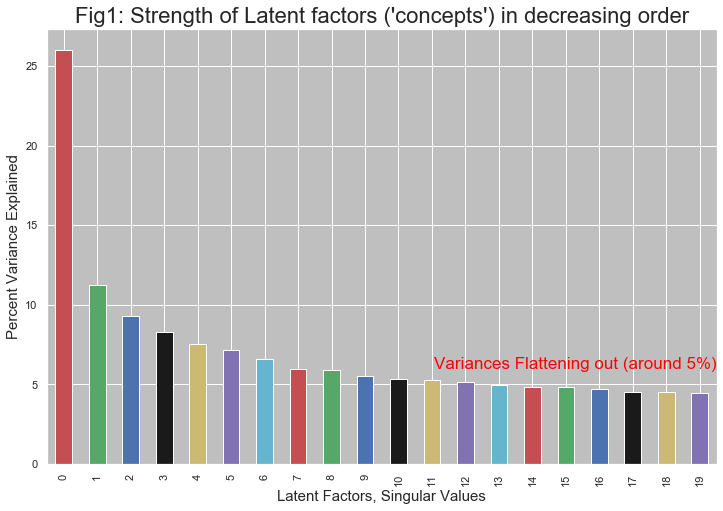

In [750]:
# converting matrix to dataframe for plotting purposes only
var_ = pd.DataFrame(singularValues)
var_.columns = ['variance']
var_.index.names = ['factors']
var_['percent_variance'] = var_['variance']/var_['variance'].sum()*1000 #Scaling the most impactful explained variances
varplot=var_.loc[:, ['percent_variance']]

plt.rcParams['figure.figsize']=(12,8)
my_colors = 'rgbkymc'    
sns.set_style("darkgrid",{"axes.facecolor": ".75"}) 
 
varplot[:20].plot(kind="bar",color=my_colors)
plt.legend('',frameon=False)
plt.xticks(rotation=90, horizontalalignment="center")
plt.title("Fig1: Strength of Latent factors ('concepts') in decreasing order", fontsize=22)
plt.xlabel("Latent Factors, Singular Values",fontsize=15)
plt.ylabel("Percent Variance Explained",fontsize=15)
# anotating line where flatline starts
plt.text(19.5,6,'Variances Flattening out (around 5%)',horizontalalignment='right',fontsize=17,color = 'red')
plt.show()

In [751]:
#subsetting U,V and Singular Matrix to get only the first Top 20 Singular values of importance
# picking up only the first 20 columns of U
Ucolumns = U[: , 0:20]
Ucolumns
# picking up only the first 20 rows of V^t
Vrows = V[0:20,:]
Vrows
# picking up only the first 20 columns & rows of the Singular Matrix; Sigma
Sigma2 = Sigma [0:20 , 0:20]

# R' Predicted Ratings Matrix

-R' was based on the top percentages (greater than 5%) of Importance in the Singular Matrix

In [752]:
Rprime = np.dot(Ucolumns, np.dot(Sigma2, Vrows))
Rprime_selectfew=Rprime
Rprime_selectfew[[0, 1, 3], :]
# printing only a select few to minimize clutter in Github
print(np.round(Rselectfew- Rprime_selectfew[[0, 1, 3], :], decimals=10)) 

[[ 1.70966445e+00 -1.46020278e+00  2.96649339e+00 ...  8.58390300e-03
   8.58390300e-03  3.86058803e-02]
 [-3.85700733e-02 -1.52719248e-02 -1.69677687e-02 ... -1.06623167e-02
  -1.06623167e-02 -1.56101189e-02]
 [-2.23862066e+00 -6.00106271e-02 -3.93842306e-02 ... -2.02895660e-03
  -2.02895660e-03  7.35948640e-03]]


In [753]:
rmse_visual = sqrt(mean_squared_error(R, Rprime))
rmse_visual
print("The RSME using Singular values (variances) greater than 5% is:")  
print(f"{rmse_visual:.2%}")

The RSME using Singular values (variances) greater than 5% is:
35.19%


# Using Chp 11.3.4; Rule of thumb

(2) Second method, utilized the "Rule" as prescribed in Chapter 11 of "Mining of Massive Datasets", Stanford University

- The sum of the squares of the retained singular values should be at least 80% of the sum of the squares of all the singular values

- Acceptable Retention rate between 80%-90% of the total energy in original Σ (Singular Matrix)

In [754]:
# function to calculate the diagonals of the Singular Matrix
def diagonalsquare(mat, row, column) : 
    mat1=0
    # This loop is for finding square 
    # of diagonal elements 
    for i in range(0, row) : 
        for j in range(0, column) : 
  
            # if this condition will  
            # become true then we will 
            # get diagonal element 
            if (i == j) :                  
                mat1+=mat[i][j]*mat[i][j]
            
    return mat1

In [755]:
Total_energy=diagonalsquare(Sigma, len(Sigma), len(Sigma)) 
print("the Total Energy of Σ Matrix is:")
(round(Total_energy, 2))

the Total Energy of Σ Matrix is:


1345934.5

In [756]:
first_200=diagonalsquare(Sigma, 200, 200) 
print("The sum of squares of the {n}th singular values is:".format(n=200))   
(round(first_200, 2))

The sum of squares of the 200th singular values is:


1165856.0

In [758]:
percent_energy=first_200/Total_energy
print("The Retained Energy is:")
print(f"{percent_energy:.2%}")

The Retained Energy is:
86.62%


# Using 86% of Retained Energy from the Σ Singular Matrix

- The sum of squares of first 200th singular values from the Σ Matrix, resulted in 86% of total Energy

In [759]:
#subsetting U,V and Singular Matrix to get only the first Top 200 Singular values of importance
# picking up only the first 200 columns of U
Ucol_200 = U[: , 0:200]
Ucol_200
# picking up only the first 200 rows of V^t
Vrows_200 = V[0:200,:]
Vrows_200
# picking up only the first 200 columns & rows of the Singular Matrix; Sigma
Sigma_200 = Sigma [0:200 , 0:200]

In [760]:
Rprime_200 = np.dot(Ucol_200 , np.dot(Sigma_200, Vrows_200))

Rprime_200_selectfew=Rprime_200
Rprime_200_selectfew[[0, 1, 3], :]
# printing only a select few to minimize clutter in Github
print(np.round(Rselectfew- Rprime_200_selectfew[[0, 1, 3], :], decimals=10)) 

[[-0.43655905  0.08361363 -0.20084158 ...  0.00126437  0.00126437
   0.07392656]
 [ 0.06733716 -0.2615907  -0.02953569 ... -0.06033543 -0.06033543
  -0.09293932]
 [ 0.54916312  0.43141556  0.07584666 ... -0.06010546 -0.06010546
   0.01480539]]


In [761]:
rmse_200 = sqrt(mean_squared_error(R, Rprime_200))
rmse_200
print("The RSME using {n:.2%} of the Total Energy is:".format(n=percent_energy))  
print(f"{rmse_200:.2%}")

The RSME using 86.62% of the Total Energy is:
17.42%


# What if we normalize the R Matrix?

- Will the RSME improved if the original R matrix was normalized?

In [762]:
user_ratings_mean = np.mean(R, axis = 1)#mean ratings of users
R_mean = R - user_ratings_mean.reshape(-1, 1)
R_mean[[0, 1, 3], :] #Again showing only a select few rows to avoid clutter

array([[ 3.89582476, -0.10417524,  3.89582476, ..., -0.10417524,
        -0.10417524, -0.10417524],
       [-0.01177499, -0.01177499, -0.01177499, ..., -0.01177499,
        -0.01177499, -0.01177499],
       [-0.07897984, -0.07897984, -0.07897984, ..., -0.07897984,
        -0.07897984, -0.07897984]])

In [763]:
Ucol_200mean, singularValuesmean, Vrows_200mean = svd(R_mean, full_matrices=False)
Sigma3 = np.diag(singularValuesmean) #making singular value matrix, a diagonal matrix

In [764]:
#subsetting U,V and Singular Matrix to get only the first Top 200 Singular values of importance
# picking up only the first 200 columns of U
Ucol_200mean = U[: , 0:200]
Ucol_200mean
# picking up only the first 200 rows of V^t
Vrows_200mean = V[0:200,:]
Vrows_200mean
# picking up only the first 200 columns & rows of the Singular Matrix; Sigma
Sigma_200mean = Sigma3 [0:200 , 0:200]

In [765]:
Rprime_mean = np.dot(Ucol_200mean, np.dot(Sigma_200mean, Vrows_200mean))

Rprime_mean_selectfew=Rprime_mean
Rprime_mean_selectfew[[0, 1, 3], :]
# printing only a select few to minimize clutter in Github
print(np.round(R_mean[[0, 1, 3], :]- Rprime_mean_selectfew[[0, 1, 3], :], decimals=10)) 

[[-0.28785706  0.10703033 -0.25126826 ... -0.10317689 -0.10317689
  -0.02947877]
 [ 0.0801649  -0.26265043 -0.03717618 ... -0.07192359 -0.07192359
  -0.10445421]
 [ 0.59124728  0.40308951  0.01279566 ... -0.13889406 -0.13889406
  -0.06341648]]


In [766]:
rmse_200mean = sqrt(mean_squared_error(R_mean, Rprime_mean))
rmse_200mean
print("The RSME using mean of original Ratings matrix is:")  
print(f"{rmse_200mean:.2%}")

The RSME using mean of original Ratings matrix is:
20.07%


# Prediction table: Making Predictions from the Decomposed Matrices (SVD)

- Making a prediction table by adding back the mean of the users' ratings
- Using K=200 factors based on the lowest RSME value (from calculations above)

In [767]:
Upred, Spred, VTpred = svds(R_mean, k = 200)
S_diagonal_pred = np.diag(Spred)
R_hat = np.dot(np.dot(Upred, S_diagonal_pred ), VTpred)
all_user_predicted_ratings =R_hat + user_ratings_mean.reshape(-1, 1)

In [768]:
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = R_df.columns)
#Showing the prediction Table using K=200, 86% Retained energy
preds_df.head(5)


movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
0,4.435755,-0.083791,4.200622,0.025446,0.244212,4.010231,0.530547,-0.051419,-0.130543,0.023606,...,-0.001597,-0.001391,-0.001804,-0.001804,-0.001597,-0.001804,-0.001597,-0.001597,-0.001597,-0.073828
1,-0.063229,0.260096,0.025182,-0.020951,0.059478,-0.100835,-0.160863,0.075580,-0.086067,0.153875,...,0.063050,0.054446,0.071655,0.071655,0.063050,0.071655,0.063050,0.063050,0.063050,0.095997
2,0.056905,0.074516,0.022262,0.027251,0.101619,0.285050,0.090126,-0.009012,0.030087,0.081564,...,0.004843,0.005605,0.004082,0.004082,0.004843,0.004082,0.004843,0.004843,0.004843,0.014346
3,-0.558018,-0.433690,-0.073891,-0.036934,-0.129166,-0.341562,0.592600,-0.110683,-0.265258,0.126421,...,0.059278,0.050892,0.067664,0.067664,0.059278,0.067664,0.059278,0.059278,0.059278,-0.014183
4,2.425556,0.474888,0.061707,0.026410,0.224812,-0.034685,0.553672,0.212439,-0.302194,0.251839,...,0.044791,0.038458,0.051124,0.051124,0.044791,0.051124,0.044791,0.044791,0.044791,0.064713


# Making Movie Recommendations

- Randomly picking a user (user Id 400 in this example) to make predictions off the pred_df matrix (k=200) , see above  

- Note: This function was borrowed from the blog: "Matrix Factorization for Movie Recommendations in Python" by Nick Becker

- Reference 2:  https://beckernick.github.io/matrix-factorization-recommender/

In [769]:
# This function returns already rated movies by particular users and its forward-looking recommendations
def recommend_movies(predictions_df, userId, movies_df, original_ratings_df, num_recommendations=5):
    
    # Get and sort the user's predictions
    user_row_number = userId- 1 # UserID starts at 1, not 0
    sorted_user_predictions = predictions_df.iloc[user_row_number].sort_values(ascending=False)
    
    # Get the user's data and merge in the movie information.
    user_data = original_ratings_df[original_ratings_df.userId == (userId)]
    user_full = (user_data.merge(movies_df, how = 'left', left_on = 'movieId', right_on = 'movieId').
                     sort_values(['rating'], ascending=False)
                 )

    print ('User {0} has already rated {1} movies.'.format(userId, user_full.shape[0]))
    print ('Recommending the highest {0} predicted ratings movies not already rated.'.format(num_recommendations))
    
    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    recommendations = (movies_df[~movies_df['movieId'].isin(user_full['movieId'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'movieId',
               right_on = 'movieId').
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )

    return user_full, recommendations



In [770]:
already_rated, predictions = recommend_movies(preds_df, 400, df_movies, df_ratings, 10)

User 400 has already rated 43 movies.
Recommending the highest 10 predicted ratings movies not already rated.


In [771]:
already_rated.head(10)

,userId,movieId,rating,title,genres
0,400,6,5.0,Heat (1995),Action|Crime|Thriller
10,400,608,5.0,Fargo (1996),Comedy|Crime|Drama|Thriller
1,400,47,5.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
26,400,3949,5.0,Requiem for a Dream (2000),Drama
18,400,1210,5.0,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Sci-Fi
30,400,44199,5.0,Inside Man (2006),Crime|Drama|Thriller
15,400,1196,5.0,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi
38,400,79132,5.0,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX
12,400,858,5.0,"Godfather, The (1972)",Crime|Drama
23,400,2571,5.0,"Matrix, The (1999)",Action|Sci-Fi|Thriller


In [772]:
predictions

,movieId,title,genres
4108,5952,"Lord of the Rings: The Two Towers, The (2002)",Adventure|Fantasy
814,1089,Reservoir Dogs (1992),Crime|Mystery|Thriller
1711,2329,American History X (1998),Crime|Drama
967,1291,Indiana Jones and the Last Crusade (1989),Action|Adventure
1261,1704,Good Will Hunting (1997),Drama|Romance
7729,91529,"Dark Knight Rises, The (2012)",Action|Adventure|Crime|IMAX
5665,27773,Old Boy (2003),Mystery|Thriller
3114,4226,Memento (2000),Mystery|Thriller
2969,4011,Snatch (2000),Comedy|Crime|Thriller
2054,2762,"Sixth Sense, The (1999)",Drama|Horror|Mystery


# Summary

- This project was to approximate the original Utility Ratings Matrix using Singular Value Decomposition (SVD). SVD is a way of reducing dimensionalities of the original matrix to lower-ranked dimensions for ease in computation and efficiency in storage. 
- 2 methods were utilized to determine how many dimenions to elminate without losing the overall integrity of the orignal Utility matrix.  We first compute the percentage of variances that were most impactful (Fig 1) and keeping only those that were greater than 5%.  This effectively reduces the dimensions to k=20.  The 2nd method was to apply the rule of thumb as subscribed in Chapter 11 of the book;  retaining between 80-90% of the total "energy" from the Σ Singular Matrix.  This reduced the dimensionalities to k=200 with 86% of energy retained.  
- The 3rd method is to re-use the same k=200 dimension and applied it to the normalized utility matrix.
- RSMEs of the 3 methods was then use to estimate how "close" the approximation was to the original set of ratings:

(1) RSME of K=20: 35.19%

(2) RSME of K=200: 17.42%

(2) RSME of K=200, normalized: 20.07%

- The prediction matrix used the K=200 dimensions as it was the method with the lowest RSME and it was then applied to a randomly selected user (userId: 400) to make forward-looking recommendations.

#  Conclusions

Intuitively, one can see that as K increase, accuruacy increases.  However, the trade-offs between reduced dimensions of the approximating matrix for ease of computation and storage efficacy, is reduced accuracy levels. The other disadvantage of SVD, is the "lost" in connections between predictions and the original matrix.  The reason is because by creating an intermediate features called latent factors/concepts, the underlying tastes expressed by latent features are not directly interpretable due to lack of cause-effect relationships between users and the items itself.
 